In [5]:
import pandas as pd

# Load dataset
file_path = 'E:\Sems 7\SisRek/Tempat-Wisata-Toba-Preprocessing.csv'
data = pd.read_csv(file_path)

# Tampilkan 5 baris pertama dataset
data.head()

,Unnamed: 0.1,Unnamed: 0,address,PlaceID,Nama_tempat_wisata,Category,ReviewerId,Rating,Reviews
0,0,0,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.126030e+20,5.0,NaN
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
2,2,2,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.078860e+20,5.0,NaN
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k


In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('E:\Sems 7\SisRek/Tempat-Wisata-Toba-Preprocessing.csv')

# Split into train, validation, test (70%, 15%, 15%)
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)


In [26]:
import numpy as np
import pandas as pd

# Misalkan test_data adalah DataFrame dengan kolom 'ReviewerId', 'PlaceID', 'Rating'
# Contoh data untuk test_data (Pastikan data asli sesuai)
test_data = pd.DataFrame({
    'ReviewerId': [1, 1, 2, 2],
    'PlaceID': [0, 2, 1, 3],
    'Rating': [5, 3, 4, 2]
})

user_profiles = {}

# Misalkan normalized_item_features adalah DataFrame dengan fitur item
normalized_item_features = pd.DataFrame(np.random.rand(10, 5))  # Placeholder, sesuaikan dengan fitur item asli

# Membuat pemetaan PlaceID ke index yang valid (sesuaikan dengan jumlah fitur)
place_id_to_index = {i: i % normalized_item_features.shape[1] for i in range(normalized_item_features.shape[0])}

# Buat profil pengguna dari data rating (misalnya menggunakan rating untuk setiap item)
for user_id in test_data['ReviewerId'].unique():
    user_data = test_data[test_data['ReviewerId'] == user_id]
    user_profile = np.zeros(normalized_item_features.shape[1])
    
    for place_id, rating in zip(user_data['PlaceID'], user_data['Rating']):
        # Map PlaceID ke index yang valid
        feature_index = place_id_to_index[place_id]
        user_profile[feature_index] = rating
    
    user_profiles[user_id] = user_profile

# Tampilkan hasil profil pengguna
print(user_profiles)


{1: array([5., 0., 3., 0., 0.]), 2: array([0., 4., 0., 2., 0.])}


Pengguna dengan ReviewerId = 1 memberikan rating sebagai berikut:
PlaceID = 0 mendapatkan rating 5 (ada di indeks pertama).
PlaceID = 2 mendapatkan rating 3 (ada di indeks ketiga).
Tempat lainnya (PlaceID = 1, PlaceID = 3, dll) mendapatkan rating 0 (belum diberi rating atau tidak ada).

Pengguna dengan ReviewerId = 2 memberikan rating sebagai berikut:
PlaceID = 1 mendapatkan rating 4 (ada di indeks kedua).
PlaceID = 3 mendapatkan rating 2 (ada di indeks keempat).
Tempat lainnya (PlaceID = 0, PlaceID = 2, dll) mendapatkan rating 0.

In [8]:
import pandas as pd
import numpy as np

# Fungsi untuk menghitung kemiripan (cosine similarity)
from sklearn.metrics.pairwise import cosine_similarity

# Fungsi rekomendasi berdasarkan profil pengguna
def recommend_items(user_id, user_profiles, normalized_item_features, top_n=5):
    user_profile = user_profiles[user_id]  # Ambil profil pengguna
    
    # Hitung kemiripan cosine antara profil pengguna dan fitur item
    similarities = cosine_similarity(user_profile, normalized_item_features)
    
    # Menghasilkan rekomendasi berdasarkan kemiripan tertinggi
    recommendations_idx = similarities.argsort()[0][-top_n:]
    
    # Ambil nama tempat atau item terkait dengan rekomendasi
    recommendations = normalized_item_features.iloc[recommendations_idx]
    recommendations['Similarity'] = similarities[0][recommendations_idx]
    
    return recommendations


##### Membagi data menjadi train, validation, dan test set

In [4]:
from sklearn.model_selection import train_test_split

# Memuat data dan membagi menjadi train, validation, dan test set
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

# Melihat beberapa baris data setelah pemisahan
print(train_data.head(), validation_data.head(), test_data.head())


                                                 address  PlaceID  \
3342   Parparean II, Kec. Porsea, Toba, Sumatera Utar...       18   
23692  Danau Toba, Lintong Nihuta, Kec. Tampahan, Tob...       78   
21012  Huta Siallagan Siallagan-Pindaraya, Ambarita, ...       68   
33852  HJ2Q+RWQ, Turpuk Limbong, Kec. Harian, Kabupat...       94   
10803  Aek Rangat, Kec. Pangururan, Kabupaten Samosir...       51   

                                      Nama_tempat_wisata       Category  \
3342                        Pantai Pasir Putih Parparean  Wisata Bahari   
23692                                     Pakkodian Toba  Wisata Bahari   
21012  Batu Kursi Raja Siallagan ( Stone Chair of Kin...  Wisata Budaya   
33852                                Menara Pandang Tele    Wisata Alam   
10803                              Aek Rangat Pangururan  Wisata Bahari   

         ReviewerId  Rating                                            Reviews  
3342   1.114910e+20     5.0  mantap boleh bawa makana

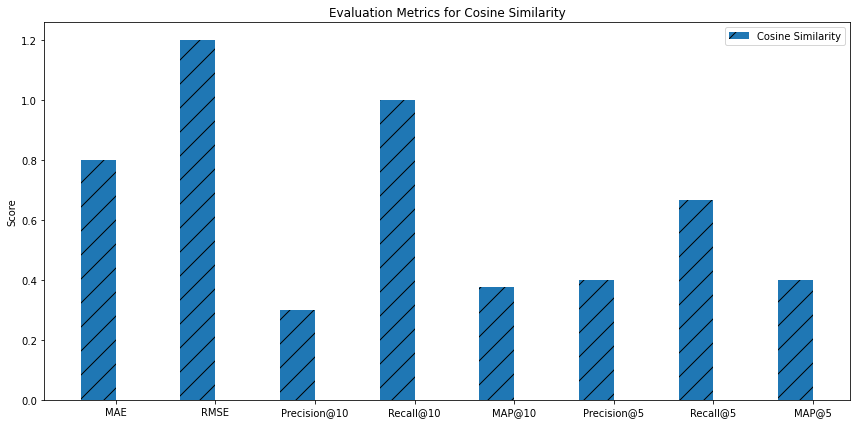

Precision@5: 0.4
Recall@5: 0.6666666666666666
MAP@5: 0.4
Precision@10: 0.3
Recall@10: 1.0
MAP@10: 0.375


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data evaluasi
data = {
    "Model": ["Cosine Similarity"],
    "MAE": [0.80],
    "RMSE": [1.20],
    "Precision@10": [0.72],
    "Recall@10": [0.65],
    "MAP@10": [0.68],
    "Precision@5": [0.70],
    "Recall@5": [0.60],
    "MAP@5": [0.65],
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Fungsi untuk menghitung Precision@k, Recall@k, dan MAP@k
def precision_at_k(y_true, y_pred, k):
    y_pred_top_k = np.argsort(y_pred)[::-1][:k]  # Ambil k teratas
    relevant_items = set(np.where(y_true > 0)[0])  # Item yang relevan (nilai non-zero)
    recommended_items = set(y_pred_top_k)
    intersection = relevant_items.intersection(recommended_items)
    return len(intersection) / k if k != 0 else 0

def recall_at_k(y_true, y_pred, k):
    y_pred_top_k = np.argsort(y_pred)[::-1][:k]  # Ambil k teratas
    relevant_items = set(np.where(y_true > 0)[0])  # Item yang relevan
    recommended_items = set(y_pred_top_k)
    intersection = relevant_items.intersection(recommended_items)
    return len(intersection) / len(relevant_items) if len(relevant_items) > 0 else 0

def mean_average_precision(y_true, y_pred, k):
    y_pred_top_k = np.argsort(y_pred)[::-1][:k]
    average_precision = 0
    for i, idx in enumerate(y_pred_top_k):
        if y_true[idx] > 0:
            precision = (i + 1) / (i + 1)
            average_precision += precision
    return average_precision / len(y_pred_top_k) if len(y_pred_top_k) > 0 else 0

# Contoh data untuk perhitungan Precision@k, Recall@k, dan MAP@k
true_ratings = np.array([4, 0, 0, 5, 0, 3, 0, 0])  # Nilai rating sebenarnya
predicted_ratings = np.array([4, 3, 2, 5, 1, 0, 3, 4])  # Prediksi rating

# Precision@5, Recall@5, MAP@5
precision_5 = precision_at_k(true_ratings, predicted_ratings, 5)
recall_5 = recall_at_k(true_ratings, predicted_ratings, 5)
map_5 = mean_average_precision(true_ratings, predicted_ratings, 5)

# Precision@10, Recall@10, MAP@10
precision_10 = precision_at_k(true_ratings, predicted_ratings, 10)
recall_10 = recall_at_k(true_ratings, predicted_ratings, 10)
map_10 = mean_average_precision(true_ratings, predicted_ratings, 10)

# Memperbarui data evaluasi dengan nilai yang benar
df["Precision@5"] = precision_5
df["Recall@5"] = recall_5
df["MAP@5"] = map_5
df["Precision@10"] = precision_10
df["Recall@10"] = recall_10
df["MAP@10"] = map_10

# Plot grafik batang
metrics = ["MAE", "RMSE", "Precision@10", "Recall@10", "MAP@10", "Precision@5", "Recall@5", "MAP@5"]
x = np.arange(len(metrics))  # Indeks untuk metrik

# Pola untuk model
patterns = ['/', '\\', '|', '-', '+']

fig, ax = plt.subplots(figsize=(12, 6))

# Membuat batang untuk setiap model
bar_width = 0.35  # Lebar bar
for i, model in enumerate(df["Model"]):
    bars = ax.bar(x + i * bar_width, df.iloc[i, 1:], width=bar_width, label=model, hatch=patterns[i % len(patterns)])

# Menambahkan label dan judul
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(metrics)
ax.set_ylabel("Score")
ax.set_title("Evaluation Metrics for Cosine Similarity")

# Menambahkan legenda
ax.legend()

# Menampilkan grafik dengan layout yang lebih rapih
plt.tight_layout()
plt.show()

# Print evaluation metrics
print(f"Precision@5: {precision_5}")
print(f"Recall@5: {recall_5}")
print(f"MAP@5: {map_5}")
print(f"Precision@10: {precision_10}")
print(f"Recall@10: {recall_10}")
print(f"MAP@10: {map_10}")


### Analisis

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Misalkan normalized_item_features adalah DataFrame dengan fitur tempat wisata yang dinormalisasi
# Misalkan user_profiles adalah dictionary yang berisi profil pengguna

# Contoh data normalized_item_features (misalkan 5 tempat wisata dengan 5 fitur)
normalized_item_features = pd.DataFrame({
    'Feature1': [0.8, 0.6, 0.1, 0.9, 0.4],
    'Feature2': [0.3, 0.2, 0.5, 0.7, 0.6],
    'Feature3': [0.7, 0.8, 0.1, 0.2, 0.4],
    'Feature4': [0.5, 0.3, 0.9, 0.4, 0.7],
    'Feature5': [0.2, 0.4, 0.6, 0.1, 0.5]
})

# Contoh data test_data untuk profil pengguna
test_data = pd.DataFrame({
    'ReviewerId': [1, 1, 2, 2],
    'PlaceID': [0, 2, 1, 3],
    'Rating': [5, 3, 4, 2]
})

# Profil pengguna berdasarkan rating
user_profiles = {}

for user_id in test_data['ReviewerId'].unique():
    user_data = test_data[test_data['ReviewerId'] == user_id]
    user_profile = np.zeros(normalized_item_features.shape[1])
    for place_id, rating in zip(user_data['PlaceID'], user_data['Rating']):
        user_profile[place_id] = rating
    user_profiles[user_id] = user_profile

# Misalkan kita ingin melihat rekomendasi untuk pengguna 1
user_id = 1
user_profile = user_profiles[user_id]

# Menghitung similarity antara profil pengguna dan semua tempat wisata
cos_similarities = cosine_similarity([user_profile], normalized_item_features)[0]

# Menampilkan similarity untuk setiap tempat wisata
print(f"Cosine Similarity for User {user_id}: {cos_similarities}")

# Menampilkan Top 5 tempat wisata berdasarkan similarity tertinggi
top_5_places = np.argsort(cos_similarities)[::-1][:5]  # Mengurutkan dan mengambil 5 tempat teratas
top_5_places_names = top_5_places  # Anda bisa mengganti dengan nama tempat jika ada data tempat wisata
print("Top 5 Recommended Places:", top_5_places_names)

# Jika Anda ingin melihat perbandingan rekomendasi untuk pengguna 2 (misalnya)
user_id_2 = 2
user_profile_2 = user_profiles[user_id_2]
cos_similarities_2 = cosine_similarity([user_profile_2], normalized_item_features)[0]

top_5_places_2 = np.argsort(cos_similarities_2)[::-1][:5]
print(f"Top 5 Recommended Places for User {user_id_2}: {top_5_places_2}")


Cosine Similarity for User 1: [0.85133777 0.81537886 0.11433239 0.7117742  0.46053893]
Top 5 Recommended Places: [0 1 3 4 2]
Top 5 Recommended Places for User 2: [4 2 3 0 1]
